In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

c:\Users\Jasur\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# Load the datasets
df = pd.read_csv(r"C:\Users\Jasur\Desktop\Columbia\Data Analytics\Group Project\CVD_cleaned.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
df.duplicated().sum()

80

In [6]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

First Approach: Decision Tree Classifier
Decision Tree Results:
Accuracy: 0.7185215844444053
Confusion Matrix:
 [[35295 21406]
 [10557 46296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69     56701
           1       0.68      0.81      0.74     56853

    accuracy                           0.72    113554
   macro avg       0.73      0.72      0.72    113554
weighted avg       0.73      0.72      0.72    113554

First Approach: Random Forest Classifier
Random Forest Results:
Accuracy: 0.723215386512144
Confusion Matrix:
 [[34044 22657]
 [ 8773 48080]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.60      0.68     56701
           1       0.68      0.85      0.75     56853

    accuracy                           0.72    113554
   macro avg       0.74      0.72      0.72    113554
weighted avg       0.74      0.72      0.72    113554



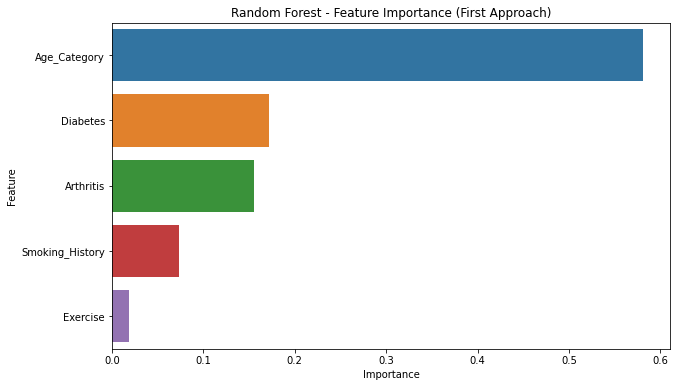

In [17]:
# Select Features and Target
selected_features = ['Exercise', 'Diabetes', 'Arthritis', 'Age_Category', 'Smoking_History']
target = 'Heart_Disease'

# Subset Data
X = df[selected_features]
y = df[target]

# Encode Categorical Variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Classifier
print("First Approach: Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest Classifier
print("First Approach: Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Random Forest - Feature Importance (First Approach)")
plt.show()

Second Approach: Decision Tree Classifier
Decision Tree Results:
Accuracy: 0.7187241312503302
Confusion Matrix:
 [[34905 21796]
 [10144 46709]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69     56701
           1       0.68      0.82      0.75     56853

    accuracy                           0.72    113554
   macro avg       0.73      0.72      0.72    113554
weighted avg       0.73      0.72      0.72    113554

Second Approach: Random Forest Classifier
Random Forest Results:
Accuracy: 0.7269140673159906
Confusion Matrix:
 [[35639 21062]
 [ 9948 46905]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70     56701
           1       0.69      0.83      0.75     56853

    accuracy                           0.73    113554
   macro avg       0.74      0.73      0.72    113554
weighted avg       0.74      0.73      0.72    113554



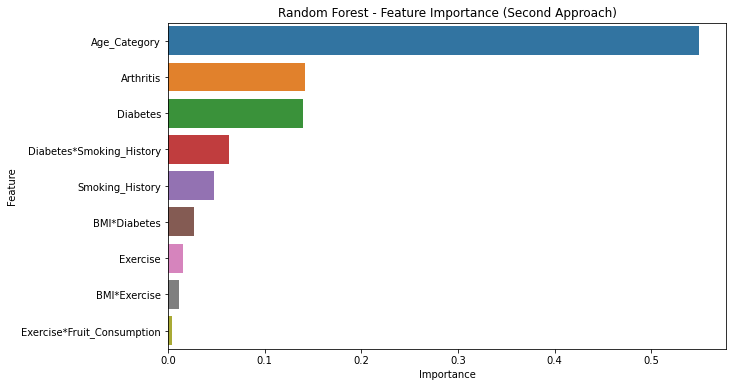

In [18]:
# Select Features and Create Interaction Terms
df['BMI*Exercise'] = df['BMI'] * df['Exercise']
df['Diabetes*Smoking_History'] = df['Diabetes'] * df['Smoking_History']
df['Exercise*Fruit_Consumption'] = df['Exercise'] * df['Fruit_Consumption']
df['BMI*Diabetes'] = df['BMI'] * df['Diabetes']

# Select Features and Target
selected_features = ['Exercise', 'Diabetes', 'Arthritis', 'Age_Category', 'Smoking_History', 
                     'BMI*Exercise', 'Diabetes*Smoking_History', 'Exercise*Fruit_Consumption', 'BMI*Diabetes']
target = 'Heart_Disease'

# Subset Data
X = df[selected_features]
y = df[target]

# Encode Categorical Variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Classifier
print("Second Approach: Decision Tree Classifier")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Random Forest Classifier
print("Second Approach: Random Forest Classifier")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Random Forest - Feature Importance (Second Approach)")
plt.show()

In [25]:
# Select the new set of features and the target variable
selected_features = ['Exercise', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 
                     'Age_Category', 'Sex', 'Diabetes', 'Arthritis']
target = 'Heart_Disease'

# Subset the data
X = df[selected_features]
y = df[target]

# Encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features for consistency
scaler = StandardScaler()
num_features = ['BMI', 'Alcohol_Consumption']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [26]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Decision Tree Classifier Results:
Accuracy: 0.9191530005989865
Confusion Matrix:
 [[56777     0]
 [ 4994     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771

Random Forest Classifier Results:
Accuracy: 0.9191530005989865
Confusion Matrix:
 [[56777     0]
 [ 4994     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



In [27]:
# Create Interaction Terms
df['BMI*Exercise'] = df['BMI'] * df['Exercise']
df['Exercise*Fruit_Consumption'] = df['Exercise'] * df['Fruit_Consumption']
df['Alcohol_Consumption*Exercise'] = df['Alcohol_Consumption'] * df['Exercise']
df['BMI*Diabetes'] = df['BMI'] * df['Diabetes']
df['Diabetes*Sex'] = df['Diabetes'] * df['Sex']
df['Diabetes*Smoking_History'] = df['Diabetes'] * df['Smoking_History']

# Select Features and Target
selected_features = ['Exercise', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 
                     'Age_Category', 'Sex', 'Diabetes', 'Arthritis', 
                     'BMI*Exercise', 'Exercise*Fruit_Consumption', 'Alcohol_Consumption*Exercise', 
                     'BMI*Diabetes', 'Diabetes*Sex', 'Diabetes*Smoking_History']
target = 'Heart_Disease'

# Subset Data
X = df[selected_features]
y = df[target]

# Encode Categorical Variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Standardize Numerical Features
scaler = StandardScaler()
num_features = ['BMI', 'Alcohol_Consumption', 'BMI*Exercise', 'Exercise*Fruit_Consumption', 
                'Alcohol_Consumption*Exercise', 'BMI*Diabetes']
X[num_features] = scaler.fit_transform(X[num_features])

In [28]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [29]:
# Train Decision Tree Classifier with Class Weights
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


# Train Random Forest Classifier with Class Weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Decision Tree Classifier Results:
Accuracy: 0.7263240396639484
Confusion Matrix:
 [[40957 15820]
 [15257 41520]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72     56777
           1       0.72      0.73      0.73     56777

    accuracy                           0.73    113554
   macro avg       0.73      0.73      0.73    113554
weighted avg       0.73      0.73      0.73    113554

Random Forest Classifier Results:
Accuracy: 0.7454779223981541
Confusion Matrix:
 [[38985 17792]
 [11110 45667]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73     56777
           1       0.72      0.80      0.76     56777

    accuracy                           0.75    113554
   macro avg       0.75      0.75      0.74    113554
weighted avg       0.75      0.75      0.74    113554



In [35]:
# Select the features and the target variable
selected_features = ['Exercise', 'Smoking_History', 'Age_Category', 'Diabetes', 'Arthritis']
target = 'Heart_Disease'

# Subset the data
X = df[selected_features]
y = df[target]

# Encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

In [36]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [37]:
# Train Decision Tree Classifier with Class Weights
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


# Train Random Forest Classifier with Class Weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Classifier Results:
Accuracy: 0.7197016397484897
Confusion Matrix:
 [[35420 21357]
 [10472 46305]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69     56777
           1       0.68      0.82      0.74     56777

    accuracy                           0.72    113554
   macro avg       0.73      0.72      0.72    113554
weighted avg       0.73      0.72      0.72    113554

Random Forest Classifier Results:
Accuracy: 0.7240431865015764
Confusion Matrix:
 [[34469 22308]
 [ 9028 47749]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69     56777
           1       0.68      0.84      0.75     56777

    accuracy                           0.72    113554
   macro avg       0.74      0.72      0.72    113554
weighted avg       0.74      0.72      0.72    113554



In [38]:
# Create Interaction Terms
df['BMI*Exercise'] = df['BMI'] * df['Exercise']
df['Exercise*Fruit_Consumption'] = df['Exercise'] * df['Fruit_Consumption']
df['Alcohol_Consumption*Exercise'] = df['Alcohol_Consumption'] * df['Exercise']
df['BMI*Diabetes'] = df['BMI'] * df['Diabetes']
df['Diabetes*Sex'] = df['Diabetes'] * df['Sex']
df['Diabetes*Smoking_History'] = df['Diabetes'] * df['Smoking_History']

# Select Features and Target
selected_features = ['Exercise', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 
                     'Age_Category', 'Sex', 'Diabetes', 'Arthritis', 
                     'BMI*Exercise', 'Exercise*Fruit_Consumption', 'Alcohol_Consumption*Exercise', 
                     'BMI*Diabetes', 'Diabetes*Sex', 'Diabetes*Smoking_History']
target = 'Heart_Disease'

# Subset the data
X = df[selected_features]
y = df[target]

# Encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Standardize Numerical Features
scaler = StandardScaler()
num_features = ['BMI', 'Alcohol_Consumption', 'BMI*Exercise', 'Exercise*Fruit_Consumption', 
                'Alcohol_Consumption*Exercise', 'BMI*Diabetes']
X[num_features] = scaler.fit_transform(X[num_features])

In [39]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [40]:
# Train Decision Tree Classifier with Class Weights
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


# Train Random Forest Classifier with Class Weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Decision Tree Classifier Results:
Accuracy: 0.7263240396639484
Confusion Matrix:
 [[40957 15820]
 [15257 41520]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72     56777
           1       0.72      0.73      0.73     56777

    accuracy                           0.73    113554
   macro avg       0.73      0.73      0.73    113554
weighted avg       0.73      0.73      0.73    113554

Random Forest Classifier Results:
Accuracy: 0.7454779223981541
Confusion Matrix:
 [[38985 17792]
 [11110 45667]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73     56777
           1       0.72      0.80      0.76     56777

    accuracy                           0.75    113554
   macro avg       0.75      0.75      0.74    113554
weighted avg       0.75      0.75      0.74    113554



In [44]:
# Create Interaction Terms
df['BMI*Exercise'] = df['BMI'] * df['Exercise']
df['Exercise*Fruit_Consumption'] = df['Exercise'] * df['Fruit_Consumption']
df['Alcohol_Consumption*Exercise'] = df['Alcohol_Consumption'] * df['Exercise']
df['BMI*Diabetes'] = df['BMI'] * df['Diabetes']
df['Diabetes*Sex'] = df['Diabetes'] * df['Sex']
df['Diabetes*Smoking_History'] = df['Diabetes'] * df['Smoking_History']

# Select Features and Target
selected_features = ['Exercise', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 
                     'Age_Category', 'Sex', 'Diabetes', 'Arthritis', 
                     'BMI*Exercise', 'Exercise*Fruit_Consumption', 'Alcohol_Consumption*Exercise', 
                     'BMI*Diabetes', 'Diabetes*Sex', 'Diabetes*Smoking_History']
target = 'Heart_Disease'

# Subset the data
X = df[selected_features]
y = df[target]

# Encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Standardize Numerical Features
scaler = StandardScaler()
num_features = ['BMI', 'Alcohol_Consumption', 'BMI*Exercise', 'Exercise*Fruit_Consumption', 
                'Alcohol_Consumption*Exercise', 'BMI*Diabetes']
X[num_features] = scaler.fit_transform(X[num_features])

In [45]:
# Train-Test Split (Original Data, No SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Classifier Results:
Accuracy: 0.9191530005989865
Confusion Matrix:
 [[56777     0]
 [ 4994     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771

Random Forest Classifier Results:
Accuracy: 0.9191530005989865
Confusion Matrix:
 [[56777     0]
 [ 4994     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771

